<a href="https://colab.research.google.com/github/simandi2877/eva/blob/master/Project3/1st_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


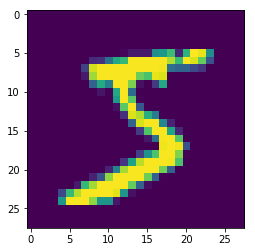

In [7]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [10]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [12]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [13]:
from keras.layers import Activation
model = Sequential()

model.add(Convolution2D(4, 3, 3, activation='relu', use_bias=False, input_shape=(28,28,1)))
model.add(Convolution2D(8, 3, 3, activation='relu', use_bias=False))
model.add(Convolution2D(12, 3, 3, activation='relu', use_bias=False))
model.add(Dropout(0.3))
model.add(Convolution2D(16, 3, 3, activation='relu', use_bias=False))
model.add(Dropout(0.6))
model.add(Convolution2D(32, 3, 3, activation='relu', use_bias=False))
model.add(Dropout(0.9))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(16, 3, 3, activation='relu', use_bias=False))
model.add(Convolution2D(10, 1, 1, activation='relu', use_bias=False))
model.add(Convolution2D(10, 7))

#model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(Convolution2D(32, 3, 3, activation='relu'))
#model.add(Convolution2D(32, 3, 3, activation='relu'))
#model.add(Convolution2D(32, 3, 3, activation='relu'))
#model.add(Convolution2D(32, 3, 3, activation='relu'))
#model.add(Convolution2D(10, 3, 3, activation='relu'))

#model.add(Convolution2D(10, 26))
 
#model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
#model.add(Convolution2D(10, 1, activation='relu'))
#model.add(Convolution2D(10, 26))
model.add(Flatten())
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(4, (3, 3), activation="relu", use_bias=False, input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", use_bias=False)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3), activation="relu", use_bias=False)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", use_bias=False)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", use_bias=False)`
  # Remove the CWD from sys

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 4)         36        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 8)         288       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 12)        864       
_________________________________________________________________
dropout_1 (Dropout)          (None, 22, 22, 12)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 20, 20, 16)        1728      
_________________________________________________________________
dropout_2 (Dropout)          (None, 20, 20, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 18, 18, 32)        4608      
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [16]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 13s 214us/step - loss: 0.3613 - acc: 0.8848
Epoch 2/10
60000/60000 [==============================] - 10s 161us/step - loss: 0.1339 - acc: 0.9595
Epoch 3/10
60000/60000 [==============================] - 10s 159us/step - loss: 0.1042 - acc: 0.9677
Epoch 4/10
60000/60000 [==============================] - 11s 185us/step - loss: 0.0888 - acc: 0.9721
Epoch 5/10
60000/60000 [==============================] - 9s 157us/step - loss: 0.0803 - acc: 0.9750
Epoch 6/10
60000/60000 [==============================] - 9s 157us/step - loss: 0.0725 - acc: 0.9777
Epoch 7/10
60000/60000 [==============================] - 9s 158us/step - loss: 0.0701 - acc: 0.9782
Epoch 8/10
60000/60000 [==============================] - 9s 157us/step - loss: 0.0626 - acc: 0.9803
Epoch 9/10
60000/60000 [==============================] - 10s 171us/step - loss: 0.0613 - acc: 0.9809
Epoch 10/10
60000/60000 [==============================] - 10s 165us/step - loss: 0.05

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [16]:
print(score)

[0.19068285135030746, 0.9729]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[1.36310235e-18 2.48699345e-17 1.46660882e-13 7.42498785e-10
  2.26733296e-21 1.70628157e-16 3.38865418e-29 1.00000000e+00
  4.23093470e-11 6.09398382e-12]
 [3.63797013e-11 2.38409756e-14 1.00000000e+00 1.12973494e-14
  1.24265535e-23 1.89515433e-17 1.56387178e-11 5.93854048e-23
  9.44949414e-13 1.84087908e-18]
 [4.26290248e-09 9.99961734e-01 2.29118609e-06 2.72603495e-10
  2.38166976e-05 8.07880041e-10 5.75776760e-10 1.18032716e-07
  1.20042150e-05 8.18114354e-10]
 [1.00000000e+00 7.71387446e-18 6.74916789e-09 5.90132555e-15
  2.34699413e-20 1.56010276e-15 9.42293882e-11 9.73641792e-11
  2.03886322e-12 4.33306311e-14]
 [5.59630196e-13 3.68132513e-14 2.26916901e-12 2.09908675e-12
  1.00000000e+00 3.89646114e-16 1.36008673e-15 2.30790581e-10
  1.31074068e-10 1.23970978e-09]
 [5.00528403e-11 9.99976516e-01 2.80577606e-08 7.84190768e-11
  3.29830641e-06 1.58848531e-12 6.05052466e-12 1.68170081e-05
  3.37931942e-06 6.29617025e-09]
 [8.59525442e-19 4.08806459e-14 2.30786529e-10 1.12699956e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

KeyError: ignored